In [72]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [73]:
# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
combined_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [74]:
# Checking the number of mice.
combined_df["Mouse ID"].value_counts()

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [75]:
# Find duplicates by ID number that shows up for Mouse ID and Timepoint. 
group_by_ID = combined_df.groupby(["Mouse ID"])
duplicates = group_by_ID["Timepoint"].value_counts()
duplicates_df = duplicates.to_frame()
dupes_df = duplicates_df.loc[(duplicates_df["Timepoint"]>1)]
dupes_df

Timepoint
Mouse ID Timepoint           
g989     0                  2
         5                  2
         10                 2
         15                 2
         20                 2

In [76]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df["Mouse ID"] !="g989"]

In [77]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].value_counts()

k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

In [78]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen



group_by_drug.agg({'Tumor Volume (mm3)':["median", "mean", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                         median       mean        var       std       sem
Drug Regimen                                                             
Capomulin             41.557809  40.675741  24.947764  4.994774  0.329346
Ceftamin              51.776157  52.591172  39.290177  6.268188  0.469821
Infubinol             51.820584  52.884795  43.128684  6.567243  0.492236
Ketapril              53.698743  55.235638  68.553577  8.279709  0.603860
Naftisol              52.509285  54.331565  66.173479  8.134708  0.596466
Placebo               52.288934  54.033581  61.168083  7.821003  0.581331
Propriva              50.446266  52.320930  43.852013  6.622085  0.544332
Ramicane              40.673236  40.216745  23.486704  4.846308  0.320955
Stelasyn              52.431737  54.233149  59.450562  7.710419  0.573111
Zoniferol             51.818479  53.236507  48.533355  6.966589  0.516398

([<matplotlib.axis.XTick at 0x7fc53ae7dc40>,
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

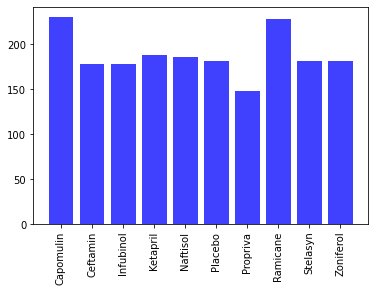

In [79]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using PYPLOT.
#x axis
x_axis = np.arange(len(group_by_drug["Drug Regimen"]))

#y axis
mouse_count = group_by_drug["Mouse ID"].count()
mouse_count_df = mouse_count.to_frame()
y_axis = mouse_count_df["Mouse ID"]

#Plot bar graph
plt.bar(x_axis, y_axis, color='b', alpha=0.75, align="center")

#tick mark management
tick_locations = [value for value in x_axis]
ticks = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol",
         "Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
plt.xticks(tick_locations, ticks,rotation=90)

Text(0.5, 1.0, 'Mice Data per Drug Regimen')

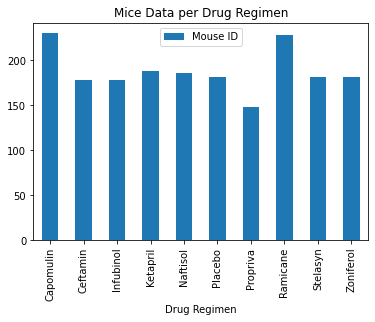

In [80]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using PANDAS.
mouse_count_df.plot(kind="bar")
plt.title("Mice Data per Drug Regimen")    

(-1.1065502689644005,
 1.1003119175697333,
 -1.1079114197007642,
 1.1041200173094385)

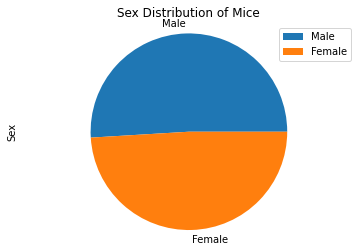

In [81]:
# Generate a pie plot showing the distribution of female versus male mice using PANDAS
sex = clean_df["Sex"].value_counts()
sex_df = sex.to_frame()

sex_pie = sex_df.plot(kind="pie", y='Sex', title=("Sex Distribution of Mice"))

plt.axis("equal")

([<matplotlib.patches.Wedge at 0x7fc5286172e0>,
 [Text(-0.6814042419013431, -0.8635324308437154, 'Male'),
  Text(0.6814042419013431, 0.8635324308437154, 'Female')],
 [Text(-0.3716750410370962, -0.47101768955111745, '51.0%'),
  Text(0.3716750410370962, 0.47101768955111745, '49.0%')])

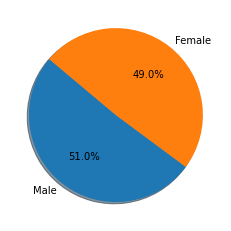

In [82]:
# Generate a pie plot showing the distribution of female versus male mice using PYPLOT
labels=["Male","Female"]
plt.pie(sex, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)

In [89]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin

Ramicane_df = clean_df.loc[clean_df['Drug Regimen'] == "Ramicane"]
Infubinol_df = clean_df.loc[clean_df['Drug Regimen'] == "Infubinol"]
Ceftamin_df = clean_df.loc[clean_df['Drug Regimen'] == "Ceftamin"]
Capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin"]

#combine dataframes
frames = [Capomulin_df, Ramicane_df, Infubinol_df, Ceftamin_df]
four_drugs = pd.concat(frames)

# Start by getting the last (greatest) timepoint for each mouse
max_time = group_by_ID["Timepoint"].max()

# Merge this group df with the original dataframe 
merged_frames = pd.merge(four_drugs,max_time, on="Mouse ID")
merged_frames["MaxTime"] = merged_frames["Timepoint_x"] == merged_frames["Timepoint_y"]

merged_frames.drop(merged_frames.loc[merged_frames['MaxTime']==False].index, inplace=True)

time_tumor_df = merged_frames[["Mouse ID","Drug Regimen","Timepoint_x","Tumor Volume (mm3)"]]
time_tumor_df 


,Mouse ID,Drug Regimen,Timepoint_x,Tumor Volume (mm3)
9,s185,Capomulin,45,23.343598
19,x401,Capomulin,45,28.484033
29,m601,Capomulin,45,28.430964
34,f966,Capomulin,20,30.485985
44,u364,Capomulin,45,31.023923
...,...,...,...,...
773,x226,Ceftamin,0,45.000000
783,x581,Ceftamin,45,64.634949
793,x822,Ceftamin,45,61.386660
803,y769,Ceftamin,45,68.594745


In [84]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment:
    volume = time_tumor_df.loc[time_tumor_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_volume.append(volume)
    #print(tumor_volume)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartile = volume.quantile([0.25,0.5,0.75])
    lower = quartile[0.25]
    upper = quartile[0.75]
    iqr = upper - lower
    #print(iqr)
   
    
    # Determine outliers using upper and lower bounds
    low_bound = lower - (1.5*iqr)
    up_bound = upper + (1.5*iqr)
    outliers = volume.loc[(volume > up_bound) | (volume < low_bound)]
    if len(outliers) > 0:
        print(f"The outliers for {drug} are {outliers}.")

The outliers for Infubinol are 506    36.321346
Name: Tumor Volume (mm3), dtype: float64.


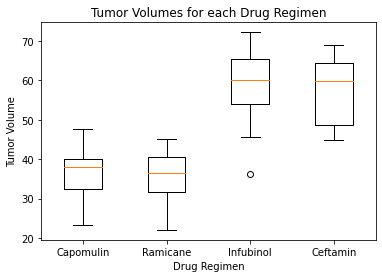

In [85]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_volume, labels = treatment)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volumes for each Drug Regimen")
plt.show()

Text(0, 0.5, 'Tumor Volume (mm3)')

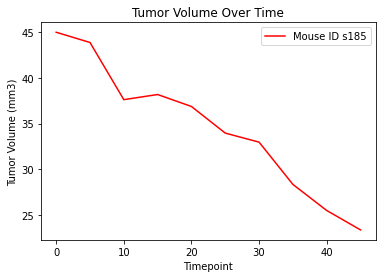

In [86]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#View Capomulin_df to choose single mouse
#Pull out data for single mouse
Mouse185 = Capomulin_df.loc[Capomulin_df["Mouse ID"]=="s185"]

#Create Line Plot
x = Mouse185["Timepoint"]
y = Mouse185["Tumor Volume (mm3)"]

plt.plot(x, y, color="red",label="Mouse ID s185")
plt.legend(loc="best")
plt.title("Tumor Volume Over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Tumor Volume (mm3)')

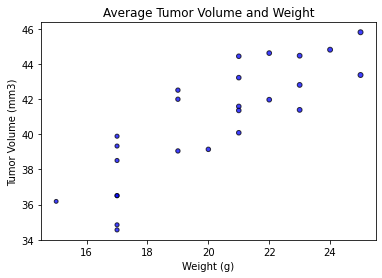

In [87]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#set x and y values
x_values = mouse_df["Weight (g)"]
y_values = mouse_df["Tumor Volume (mm3)"]

#create scatter plot
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
            s=x_values, alpha=0.75)
plt.title("Average Tumor Volume and Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

The correlation coefficient between mouse weight and tumor volume is 0.84


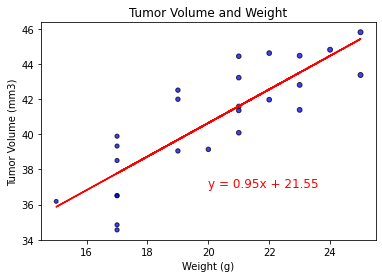

In [88]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#set x and y
x_values = mouse_df["Weight (g)"]
y_values = mouse_df["Tumor Volume (mm3)"]

#calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
            s=x_values, alpha=0.75)
plt.title("Tumor Volume and Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

#plot line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,37),fontsize=12,color="red")

#print correlation coefficient
print(f"The correlation coefficient between mouse weight and tumor volume is {round(st.pearsonr(x_values,y_values)[0],2)}")